In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [32]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
y_train = y_train.astype('float32') / 255.

# Flatten
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

In [21]:
zdim = 3

encoder_input = Input(shape=(784))
x = Dense(128, activation='relu')(encoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(12, activation='relu')(x)
encoder_output = Dense(zdim)(x)
model_encoder = Model(encoder_input, encoder_output)
model_encoder.summary()

decoder_input = Input(shape=(zdim, ))
x = Dense(12)(decoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(784, activation='relu')(x)

decoder_output = x
model_decoder = Model(decoder_input, decoder_output)
model_decoder.summary()

model_input = encoder_input
model_output = model_decoder(encoder_output)
model = Model(model_input, model_output)

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 39        
Total params: 109,555
Trainable params: 109,555
Non-trainable params: 0
_________________________________________________________________
Model: "model_15"
_________________________________________________________________
Layer (type)                 Outpu

In [22]:
zdim = 3

encoder_input = Input(shape=(784))
x = Dense(128)(encoder_input)
x = LeakyReLU(0.2)(x)
x = Dense(64)(x)
x = LeakyReLU(0.2)(x)
x = Dense(12)(x)
x = LeakyReLU(0.2)(x)
encoder_output = Dense(zdim)(x)
model_encoder = Model(encoder_input, encoder_output)
model_encoder.summary()

decoder_input = Input(shape=(zdim, ))
x = Dense(12)(decoder_input)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(784)(x)

decoder_output = x
model_decoder = Model(decoder_input, decoder_output)
model_decoder.summary()

model_input = encoder_input
model_output = model_decoder(encoder_output)
model = Model(model_input, model_output)

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 12)                780       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 12)                0  

In [23]:
adam = Adam(lr=0.005, beta_1=0.09)

model.compile(optimizer=adam, loss='mse')
model.fit(x_train,
          x_train,
          epochs=3,
          batch_size=64,
          shuffle=True,
          validation_data=(x_test, x_test))

decoded_img = model.predict(x_test)

C:\Users\HP\miniconda3\envs\gpu2.6\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0423 - val_loss: 2215.4487
Epoch 2/3
938/938 [==============================] - 2s 3ms/step - loss: 0.0300 - val_loss: 2950.4475
Epoch 3/3
938/938 [==============================] - 2s 2ms/step - loss: 0.0279 - val_loss: 2176.7605


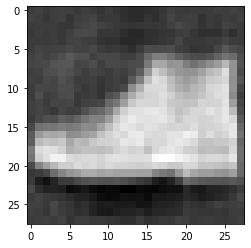

In [24]:
plt.imshow(decoded_img[0].reshape(28, 28), cmap='gray')

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


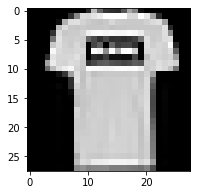

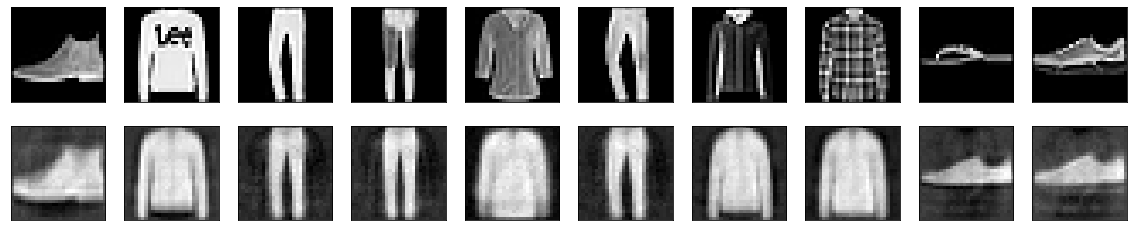

In [25]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

plt.figure(figsize=(15, 3))
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[0])
visual_model.summary()

xdata = np.reshape(x_train[1], (784))
test_img = np.expand_dims(xdata, axis=0)
feature_maps = visual_model.predict(test_img)
plt.imshow(x_train[1].reshape(28, 28), cmap='gray')

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_img[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

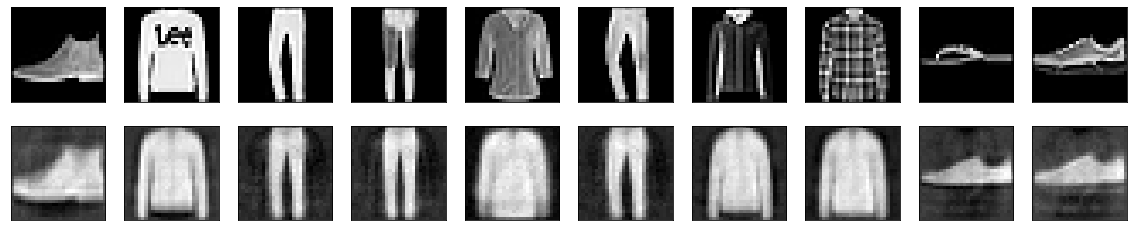

In [26]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_img[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

[[ 1510.788   502.986 -1664.82 ]]


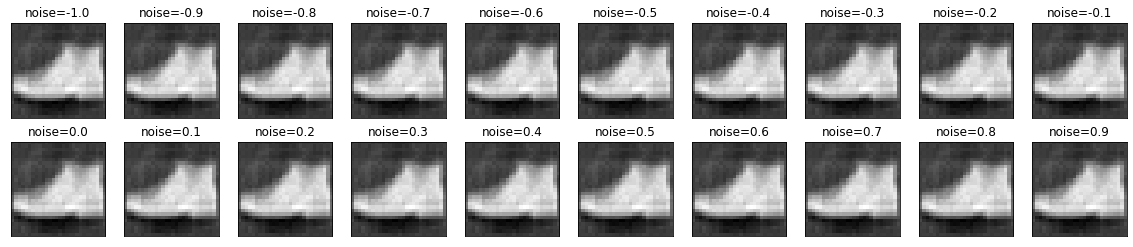

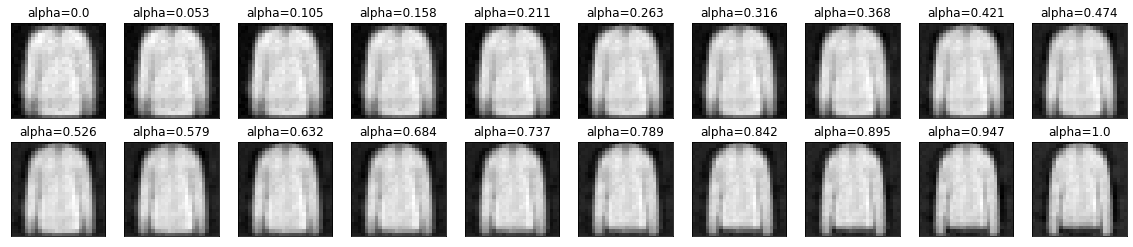

In [27]:
x0 = x_test[0]
z = model_encoder.predict(x0.reshape(1, 784))
print(np.round(z, 3))
zz = np.zeros((20, zdim))
for i in range(20):
    zz[i] = z[0] + (i - 10) / 10.0
generated_img = model_decoder.predict(zz)

plt.figure(figsize=(20, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(generated_img[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('noise=' + str((i - 10) / 10.0))
plt.show()

x4_6 = np.array((x_test[4], x_test[6]))
z = model_encoder.predict(x4_6)
zz = np.zeros((20, zdim))
for i in range(20):
    alpha = i / (20.0 - 1.0)
    zz[i] = (1.0 - alpha) * z[0] + alpha * z[1]
generated_img = model_decoder.predict(zz)

plt.figure(figsize=(20, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(generated_img[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title('alpha=' + str(round(i / (20.0 - 1.0), 3)))
plt.show()